In [3]:
import pandas as pd
df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")

In [4]:
df_train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
df_train.drop(columns=["id"],inplace=True)

In [6]:
categorical_columns = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()
print(categorical_columns)

['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']


In [7]:
categorical_value_counts = {}
for col in categorical_columns:
    categorical_value_counts[col] = df_train[col].value_counts()

for col, counts in categorical_value_counts.items():
    print(f"Value counts for column '{col}':")
    display(counts)
    print("\n")

Value counts for column 'road_type':


road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64



Value counts for column 'lighting':


lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64



Value counts for column 'weather':


weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64



Value counts for column 'road_signs_present':


road_signs_present
False    259289
True     258465
Name: count, dtype: int64



Value counts for column 'public_road':


public_road
True     260045
False    257709
Name: count, dtype: int64



Value counts for column 'time_of_day':


time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64



Value counts for column 'holiday':


holiday
True     260688
False    257066
Name: count, dtype: int64



Value counts for column 'school_season':


school_season
False    260164
True     257590
Name: count, dtype: int64

In [8]:
df_train.shape

(517754, 13)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 37.5+ MB


In [10]:
df_train.isnull().sum()

road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

print("DataFrame after Label Encoding:")
display(df_train.head(6))

DataFrame after Label Encoding:


,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,2,2,0.06,35,0,2,0,1,0,0,1,1,0.13
1,2,4,0.99,35,0,0,1,0,1,1,1,0,0.35
2,1,4,0.63,70,1,0,0,1,2,1,0,2,0.30
3,0,4,0.07,35,1,2,1,1,2,0,0,1,0.21
4,1,1,0.58,60,0,1,0,0,1,1,0,1,0.56
5,0,3,0.54,70,2,1,1,0,2,0,1,0,0.61


In [12]:
df_train.describe()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,0.995540,2.491511,0.488719,46.112575,0.957312,0.956889,0.499204,0.502256,1.003675,0.503498,0.497514,1.187970,0.352377
std,0.816326,1.120434,0.272563,15.788521,0.801956,0.804774,0.500000,0.499995,0.816191,0.499988,0.499994,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.260000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.230000
50%,1.000000,2.000000,0.510000,45.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.340000
75%,2.000000,3.000000,0.710000,60.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.460000
max,2.000000,4.000000,1.000000,70.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,7.000000,1.000000


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train['speed_limit'] = scaler.fit_transform(df_train[['speed_limit']])

print("DataFrame after MinMax scaling on 'speed_limit':")
display(df_train.head())

DataFrame after MinMax scaling on 'speed_limit':


,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,2,2,0.06,0.222222,0,2,0,1,0,0,1,1,0.13
1,2,4,0.99,0.222222,0,0,1,0,1,1,1,0,0.35
2,1,4,0.63,1.000000,1,0,0,1,2,1,0,2,0.30
3,0,4,0.07,0.222222,1,2,1,1,2,0,0,1,0.21
4,1,1,0.58,0.777778,0,1,0,0,1,1,0,1,0.56


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

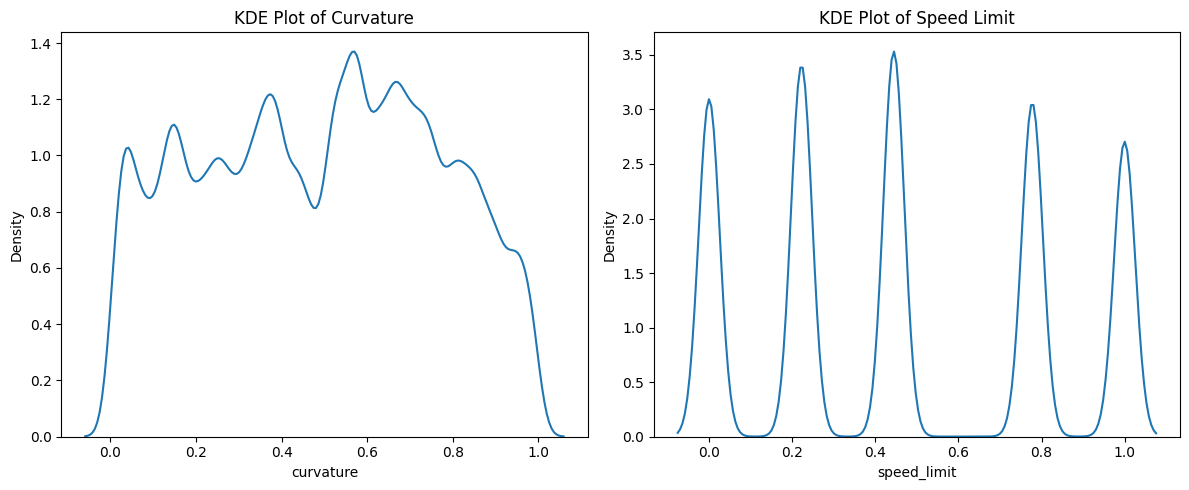

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(df_train['curvature'])
plt.title('KDE Plot of Curvature')

plt.subplot(1, 2, 2)
sns.kdeplot(df_train['speed_limit'])
plt.title('KDE Plot of Speed Limit')

plt.tight_layout()
plt.show()

In [16]:
df_test.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [17]:
df_test.drop(columns=["id"],inplace=True)

In [18]:
categorical_columns = df_test.select_dtypes(include=['object', 'bool']).columns.tolist()
print(categorical_columns)

['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']


In [19]:
categorical_value_counts = {}
for col in categorical_columns:
    categorical_value_counts[col] = df_test[col].value_counts()

for col, counts in categorical_value_counts.items():
    print(f"Value counts for column '{col}':")
    display(counts)
    print("\n")

Value counts for column 'road_type':


road_type
highway    58080
rural      57409
urban      57096
Name: count, dtype: int64



Value counts for column 'lighting':


lighting
dim         61143
daylight    59397
night       52045
Name: count, dtype: int64



Value counts for column 'weather':


weather
foggy    60236
clear    59982
rainy    52367
Name: count, dtype: int64



Value counts for column 'road_signs_present':


road_signs_present
False    87093
True     85492
Name: count, dtype: int64



Value counts for column 'public_road':


public_road
True     86673
False    85912
Name: count, dtype: int64



Value counts for column 'time_of_day':


time_of_day
morning      57747
evening      57629
afternoon    57209
Name: count, dtype: int64



Value counts for column 'holiday':


holiday
True     87125
False    85460
Name: count, dtype: int64



Value counts for column 'school_season':


school_season
False    86546
True     86039
Name: count, dtype: int64

In [20]:
df_train.isnull().sum()

road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])

print("DataFrame after Label Encoding:")
display(df_test.head())

DataFrame after Label Encoding:


,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,0,2,0.34,45,2,0,1,1,0,1,1,1
1,2,3,0.04,45,1,1,1,0,0,1,0,0
2,2,2,0.59,35,1,0,1,0,0,1,1,1
3,1,4,0.95,35,0,2,0,0,0,0,0,2
4,0,2,0.86,35,0,0,1,0,1,0,1,3


In [22]:
X_train = df_train.drop(columns=['accident_risk'])
y_train = df_train['accident_risk']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (517754, 12)
Shape of y_train: (517754,)


In [23]:
X_test = df_test.copy()
print("Shape of X_test:", X_test.shape)

Shape of X_test: (172585, 12)


In [24]:
X_test.head(5)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,0,2,0.34,45,2,0,1,1,0,1,1,1
1,2,3,0.04,45,1,1,1,0,0,1,0,0
2,2,2,0.59,35,1,0,1,0,0,1,1,1
3,1,4,0.95,35,0,2,0,0,0,0,0,2
4,0,2,0.86,35,0,0,1,0,1,0,1,3


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [26]:
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
rf_model = RandomForestRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)

lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [27]:
lr_predictions = lr_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

print("Linear Regression predictions on X_test:", lr_predictions[:5])
print("Ridge Regression predictions on X_test:", ridge_predictions[:5])
print("Lasso Regression predictions on X_test:", lasso_predictions[:5])
print("Random Forest Regressor predictions on X_test:", rf_predictions[:5])
print("Gradient Boosting Regressor predictions on X_test:", gbr_predictions[:5])

Linear Regression predictions on X_test: [10.3461024  10.18687521  8.09472162  8.23164159  8.12581572]
Ridge Regression predictions on X_test: [10.34594017 10.18671497  8.09459423  8.23151035  8.12568676]
Lasso Regression predictions on X_test: [0.3523774 0.3523774 0.3523774 0.3523774 0.3523774]
Random Forest Regressor predictions on X_test: [0.5207  0.28005 0.3614  0.6026  0.538  ]
Gradient Boosting Regressor predictions on X_test: [0.45818892 0.30048891 0.37457271 0.56007975 0.55590082]


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_predictions = lr_model.predict(X_train)
lr_mse = mean_squared_error(y_train, lr_train_predictions)
lr_r2 = r2_score(y_train, lr_train_predictions)
print(f"Linear Regression - Train MSE: {lr_mse:.4f}, Train R-squared: {lr_r2:.4f}")

ridge_train_predictions = ridge_model.predict(X_train)
ridge_mse = mean_squared_error(y_train, ridge_train_predictions)
ridge_r2 = r2_score(y_train, ridge_train_predictions)
print(f"Ridge Regression - Train MSE: {ridge_mse:.4f}, Train R-squared: {ridge_r2:.4f}")

lasso_train_predictions = lasso_model.predict(X_train)
lasso_mse = mean_squared_error(y_train, lasso_train_predictions)
lasso_r2 = r2_score(y_train, lasso_train_predictions)
print(f"Lasso Regression - Train MSE: {lasso_mse:.4f}, Train R-squared: {lasso_r2:.4f}")

rf_train_predictions = rf_model.predict(X_train)
rf_mse = mean_squared_error(y_train, rf_train_predictions)
rf_r2 = r2_score(y_train, rf_train_predictions)
print(f"Random Forest Regressor - Train MSE: {rf_mse:.4f}, Train R-squared: {rf_r2:.4f}")

gbr_train_predictions = gbr_model.predict(X_train)
gbr_mse = mean_squared_error(y_train, gbr_train_predictions)
gbr_r2 = r2_score(y_train, gbr_train_predictions)
print(f"Gradient Boosting Regressor - Train MSE: {gbr_mse:.4f}, Train R-squared: {gbr_r2:.4f}")

Linear Regression - Train MSE: 0.0078, Train R-squared: 0.7169
Ridge Regression - Train MSE: 0.0078, Train R-squared: 0.7169
Lasso Regression - Train MSE: 0.0277, Train R-squared: 0.0000
Random Forest Regressor - Train MSE: 0.0005, Train R-squared: 0.9806
Gradient Boosting Regressor - Train MSE: 0.0032, Train R-squared: 0.8832


In [29]:
evaluation_metrics = {
    'Linear Regression': {'MSE': lr_mse, 'R-squared': lr_r2},
    'Ridge Regression': {'MSE': ridge_mse, 'R-squared': ridge_r2},
    'Lasso Regression': {'MSE': lasso_mse, 'R-squared': lasso_r2},
    'Random Forest Regressor': {'MSE': rf_mse, 'R-squared': rf_r2},
    'Gradient Boosting Regressor': {'MSE': gbr_mse, 'R-squared': gbr_r2},
    
}

print("Evaluation Metrics Dictionary:")
display(evaluation_metrics)

Evaluation Metrics Dictionary:


{'Linear Regression': {'MSE': 0.007838996364148698,
  'R-squared': 0.716948644616336},
 'Ridge Regression': {'MSE': 0.007838996371468442,
  'R-squared': 0.7169486443520339},
 'Lasso Regression': {'MSE': 0.02769460811633731, 'R-squared': 0.0},
 'Random Forest Regressor': {'MSE': 0.0005380550682106105,
  'R-squared': 0.9805718475614318},
 'Gradient Boosting Regressor': {'MSE': 0.003233494006977439,
  'R-squared': 0.8832446376061928}}

In [32]:
new_data = [[1, 4, 0.44, 40,0,1,1,0,2,0,1,3]]   


rf_new_prediction = rf_model.predict(new_data)

print("Predicted value (Random Forest):", rf_new_prediction)


Predicted value (Random Forest): [0.1889]


C:\Users\Yash_Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
